In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk

In [172]:
df= pd.read_csv(r'C:\Users\ella.gorgin\Dropbox\Data_Analytics\Data_sets\Amazon_fine_food_reviews\Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [173]:
df.shape

(568454, 10)

In [174]:
df=df.head(5000) # for the sake of time

<AxesSubplot:xlabel='Score'>

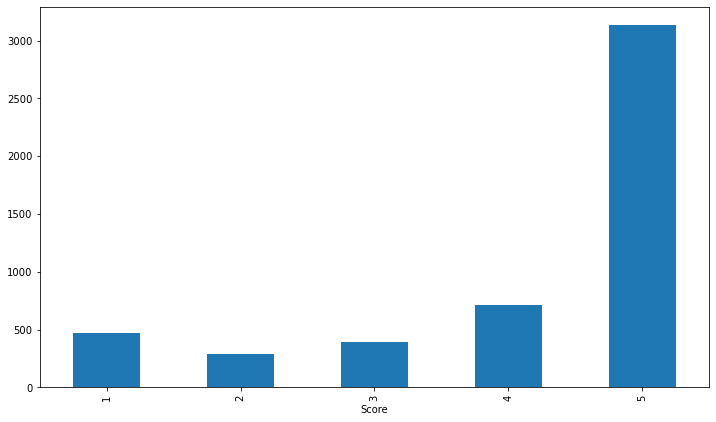

In [175]:
df.groupby('Score')['Score'].aggregate('count').plot(kind='bar',figsize=(12,7))

# Roberta (A Robustly Optimized BERT Pretraining Approach)

In [176]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [177]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [178]:
def roberta_scores(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = softmax(output[0][0].detach().numpy())
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return(scores_dict)

In [179]:
from tqdm import tqdm
roberta={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        myid = row['Id'] 
        roberta_res = roberta_scores(row['Text'])
        roberta[row['Id']]=roberta_res
    except RuntimeError:
        print(f'Broke for id {myid}')


  2%|█▎                                                                              | 84/5000 [00:13<10:12,  8.03it/s]

Broke for id 83


  4%|██▉                                                                            | 186/5000 [00:30<11:55,  6.73it/s]

Broke for id 187


 11%|████████▎                                                                      | 528/5000 [01:36<19:19,  3.86it/s]

Broke for id 529


 11%|████████▌                                                                      | 540/5000 [01:38<08:39,  8.58it/s]

Broke for id 540


 15%|███████████▊                                                                   | 745/5000 [02:19<21:43,  3.26it/s]

Broke for id 746


 17%|█████████████▋                                                                 | 865/5000 [02:41<09:20,  7.37it/s]

Broke for id 863


 21%|████████████████▍                                                             | 1052/5000 [03:22<11:52,  5.54it/s]

Broke for id 1053


 21%|████████████████▋                                                             | 1071/5000 [03:26<09:26,  6.93it/s]

Broke for id 1070


 23%|██████████████████                                                            | 1157/5000 [03:46<08:21,  7.67it/s]

Broke for id 1156


 26%|████████████████████▌                                                         | 1320/5000 [04:20<13:18,  4.61it/s]

Broke for id 1321


 27%|█████████████████████▍                                                        | 1374/5000 [04:30<26:17,  2.30it/s]

Broke for id 1375


 30%|███████████████████████▎                                                      | 1497/5000 [04:58<10:00,  5.84it/s]

Broke for id 1498


 31%|████████████████████████▌                                                     | 1574/5000 [05:18<31:17,  1.83it/s]

Broke for id 1575


 36%|████████████████████████████                                                  | 1797/5000 [05:58<04:46, 11.19it/s]

Broke for id 1796


 37%|████████████████████████████▌                                                 | 1827/5000 [06:03<08:23,  6.30it/s]

Broke for id 1826


 43%|█████████████████████████████████▊                                            | 2168/5000 [07:15<09:22,  5.03it/s]

Broke for id 2169


 45%|███████████████████████████████████                                           | 2247/5000 [07:33<10:01,  4.57it/s]

Broke for id 2248


 50%|██████████████████████████████████████▌                                       | 2475/5000 [08:25<10:03,  4.18it/s]

Broke for id 2476


 50%|██████████████████████████████████████▉                                       | 2493/5000 [08:31<07:19,  5.71it/s]

Broke for id 2492


 52%|████████████████████████████████████████▎                                     | 2585/5000 [08:51<05:33,  7.23it/s]

Broke for id 2584


 52%|████████████████████████████████████████▋                                     | 2609/5000 [08:56<10:58,  3.63it/s]

Broke for id 2610


 58%|█████████████████████████████████████████████▏                                | 2896/5000 [10:02<08:12,  4.28it/s]

Broke for id 2897
Broke for id 2898


 58%|█████████████████████████████████████████████▎                                | 2901/5000 [10:02<04:24,  7.92it/s]

Broke for id 2902


 59%|█████████████████████████████████████████████▋                                | 2929/5000 [10:08<07:01,  4.91it/s]

Broke for id 2928


 59%|█████████████████████████████████████████████▉                                | 2941/5000 [10:11<11:11,  3.06it/s]

Broke for id 2942
Broke for id 2944


 59%|█████████████████████████████████████████████▉                                | 2946/5000 [10:11<06:23,  5.35it/s]

Broke for id 2947
Broke for id 2948


 60%|███████████████████████████████████████████████▏                              | 3021/5000 [10:29<06:47,  4.85it/s]

Broke for id 3022
Broke for id 3023


 60%|███████████████████████████████████████████████▏                              | 3024/5000 [10:29<04:37,  7.11it/s]

Broke for id 3025


 66%|███████████████████████████████████████████████████▌                          | 3305/5000 [11:33<07:24,  3.81it/s]

Broke for id 3306


 76%|███████████████████████████████████████████████████████████                   | 3787/5000 [13:15<03:51,  5.24it/s]

Broke for id 3788


 79%|█████████████████████████████████████████████████████████████▉                | 3968/5000 [13:51<02:52,  5.98it/s]

Broke for id 3969


 82%|████████████████████████████████████████████████████████████████              | 4106/5000 [14:24<03:01,  4.92it/s]

Broke for id 4107


 82%|████████████████████████████████████████████████████████████████              | 4109/5000 [14:24<02:08,  6.94it/s]

Broke for id 4110


 86%|███████████████████████████████████████████████████████████████████▏          | 4306/5000 [14:59<02:24,  4.81it/s]

Broke for id 4307


 86%|███████████████████████████████████████████████████████████████████▎          | 4317/5000 [15:02<02:28,  4.61it/s]

Broke for id 4316


 88%|████████████████████████████████████████████████████████████████████▊         | 4410/5000 [15:17<01:09,  8.54it/s]

Broke for id 4408


 90%|█████████████████████████████████████████████████████████████████████▉        | 4482/5000 [15:29<01:13,  7.06it/s]

Broke for id 4483


 90%|██████████████████████████████████████████████████████████████████████▎       | 4511/5000 [15:37<01:29,  5.47it/s]

Broke for id 4512


 91%|███████████████████████████████████████████████████████████████████████       | 4552/5000 [15:48<01:41,  4.43it/s]

Broke for id 4553


 92%|███████████████████████████████████████████████████████████████████████▍      | 4582/5000 [15:59<02:55,  2.38it/s]

Broke for id 4583


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [17:27<00:00,  4.77it/s]


In [180]:
roberta=pd.DataFrame(roberta).T

In [181]:
results_df = roberta.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='right')
results_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [182]:
results_df.shape

(5000, 13)

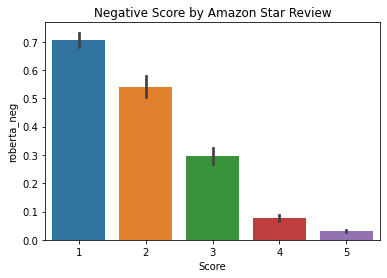

In [183]:
ax = sns.barplot(data=results_df, x='Score', y='roberta_neg')
ax.set_title('Negative Score by Amazon Star Review')
plt.show()

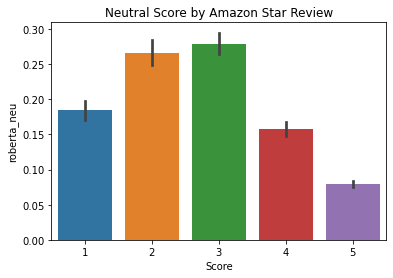

In [184]:
ax = sns.barplot(data=results_df, x='Score', y='roberta_neu')
ax.set_title('Neutral Score by Amazon Star Review')
plt.show()

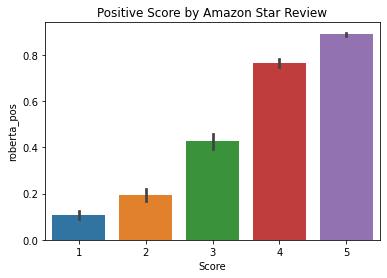

In [185]:
ax = sns.barplot(data=results_df, x='Score', y='roberta_pos')
ax.set_title('Positive Score by Amazon Star Review')
plt.show()

# Pipeline

In [186]:
from transformers import pipeline
pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [187]:
pip=[]
label = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        pipel = pipeline(text)
        pip.append(pipel[0]['score'])
        label.append(pipel[0]['label'])
    except RuntimeError:
        print(f'Broke for id {myid}')

  2%|█▎                                                                              | 84/5000 [00:08<06:31, 12.54it/s]

Broke for id 83


  4%|██▉                                                                            | 189/5000 [00:19<07:01, 11.42it/s]

Broke for id 187


 11%|████████▎                                                                      | 530/5000 [00:55<08:58,  8.31it/s]

Broke for id 529


 11%|████████▌                                                                      | 542/5000 [00:56<06:07, 12.14it/s]

Broke for id 540


 15%|███████████▊                                                                   | 745/5000 [01:21<11:31,  6.15it/s]

Broke for id 746


 17%|█████████████▋                                                                 | 866/5000 [01:34<05:27, 12.62it/s]

Broke for id 863
Broke for id 866


 20%|███████████████▉                                                              | 1019/5000 [01:51<04:57, 13.36it/s]

Broke for id 1017


 21%|████████████████▍                                                             | 1054/5000 [01:55<06:07, 10.73it/s]

Broke for id 1053


 21%|████████████████▋                                                             | 1072/5000 [01:56<05:28, 11.94it/s]

Broke for id 1070


 23%|██████████████████                                                            | 1158/5000 [02:06<05:02, 12.70it/s]

Broke for id 1156


 23%|██████████████████▏                                                           | 1167/5000 [02:07<04:17, 14.91it/s]

Broke for id 1165


 26%|████████████████████▋                                                         | 1323/5000 [02:23<05:39, 10.83it/s]

Broke for id 1321


 28%|█████████████████████▍                                                        | 1375/5000 [02:28<08:50,  6.83it/s]

Broke for id 1375


 30%|███████████████████████▎                                                      | 1496/5000 [02:42<04:58, 11.73it/s]

Broke for id 1498


 31%|████████████████████████▌                                                     | 1574/5000 [02:52<10:45,  5.31it/s]

Broke for id 1575


 36%|████████████████████████████                                                  | 1799/5000 [03:16<02:54, 18.31it/s]

Broke for id 1796


 36%|████████████████████████████▍                                                 | 1825/5000 [03:18<06:04,  8.71it/s]

Broke for id 1826


 37%|████████████████████████████▉                                                 | 1855/5000 [03:21<06:25,  8.16it/s]

Broke for id 1854


 43%|█████████████████████████████████▊                                            | 2170/5000 [03:57<04:16, 11.03it/s]

Broke for id 2169


 45%|███████████████████████████████████                                           | 2247/5000 [04:05<04:01, 11.41it/s]

Broke for id 2248


 50%|██████████████████████████████████████▉                                       | 2494/5000 [04:37<04:06, 10.15it/s]

Broke for id 2492


 52%|████████████████████████████████████████▎                                     | 2586/5000 [04:47<03:16, 12.27it/s]

Broke for id 2584


 52%|████████████████████████████████████████▋                                     | 2610/5000 [04:50<04:26,  8.97it/s]

Broke for id 2610


 58%|█████████████████████████████████████████████▏                                | 2899/5000 [05:26<03:23, 10.34it/s]

Broke for id 2897
Broke for id 2898


 58%|█████████████████████████████████████████████▎                                | 2901/5000 [05:26<02:56, 11.88it/s]

Broke for id 2902


 59%|█████████████████████████████████████████████▋                                | 2930/5000 [05:29<03:39,  9.42it/s]

Broke for id 2928


 59%|█████████████████████████████████████████████▉                                | 2945/5000 [05:30<03:23, 10.09it/s]

Broke for id 2942
Broke for id 2944


 59%|█████████████████████████████████████████████▉                                | 2947/5000 [05:31<03:05, 11.07it/s]

Broke for id 2947
Broke for id 2948


 60%|███████████████████████████████████████████████▏                              | 3024/5000 [05:40<02:59, 10.98it/s]

Broke for id 3022
Broke for id 3023
Broke for id 3025


 64%|█████████████████████████████████████████████████▋                            | 3184/5000 [06:01<03:31,  8.59it/s]

Broke for id 3183


 66%|███████████████████████████████████████████████████▌                          | 3306/5000 [06:13<02:32, 11.12it/s]

Broke for id 3306


 68%|█████████████████████████████████████████████████████▎                        | 3414/5000 [06:23<02:24, 10.99it/s]

Broke for id 3415


 76%|███████████████████████████████████████████████████████████                   | 3787/5000 [07:03<02:53,  7.00it/s]

Broke for id 3788


 79%|█████████████████████████████████████████████████████████████▉                | 3971/5000 [07:20<01:16, 13.45it/s]

Broke for id 3969


 82%|████████████████████████████████████████████████████████████████              | 4109/5000 [07:36<01:29,  9.97it/s]

Broke for id 4107


 82%|████████████████████████████████████████████████████████████████▏             | 4111/5000 [07:36<01:22, 10.84it/s]

Broke for id 4110


 86%|███████████████████████████████████████████████████████████████████▏          | 4308/5000 [07:58<01:20,  8.59it/s]

Broke for id 4307


 86%|███████████████████████████████████████████████████████████████████▎          | 4317/5000 [08:00<01:38,  6.93it/s]

Broke for id 4316


 88%|████████████████████████████████████████████████████████████████████▊         | 4410/5000 [08:11<00:51, 11.52it/s]

Broke for id 4408


 90%|█████████████████████████████████████████████████████████████████████▉        | 4485/5000 [08:19<00:34, 14.85it/s]

Broke for id 4483


 90%|██████████████████████████████████████████████████████████████████████▎       | 4511/5000 [08:22<00:51,  9.48it/s]

Broke for id 4512


 91%|███████████████████████████████████████████████████████████████████████       | 4552/5000 [08:28<00:54,  8.28it/s]

Broke for id 4553


 91%|███████████████████████████████████████████████████████████████████████▎      | 4571/5000 [08:31<01:20,  5.34it/s]

Broke for id 4572


 92%|███████████████████████████████████████████████████████████████████████▍      | 4582/5000 [08:34<01:34,  4.42it/s]

Broke for id 4583


 96%|███████████████████████████████████████████████████████████████████████████   | 4814/5000 [09:02<00:18,  9.84it/s]

Broke for id 4816


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [09:25<00:00,  8.83it/s]


In [188]:
pip=pd.DataFrame(pip)
pip.head()

,0
0,0.998385
1,0.999525
2,0.999765
3,0.999153
4,0.998708


In [189]:
results_df['pip']=pip

In [190]:
label=pd.DataFrame(label)
results_df['label']=label
results_df.shape

(5000, 15)

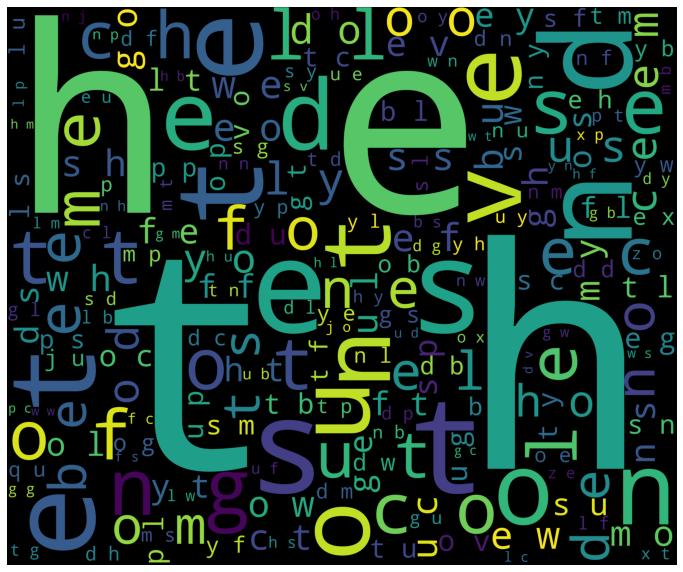

In [191]:
from wordcloud import WordCloud,STOPWORDS

new_df=results_df[results_df['label']=='POSITIVE']
words = ' '.join(' '.join(l) for l in new_df["Text"])
cleaned_word = " ".join([word for word in words.split()
                        if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

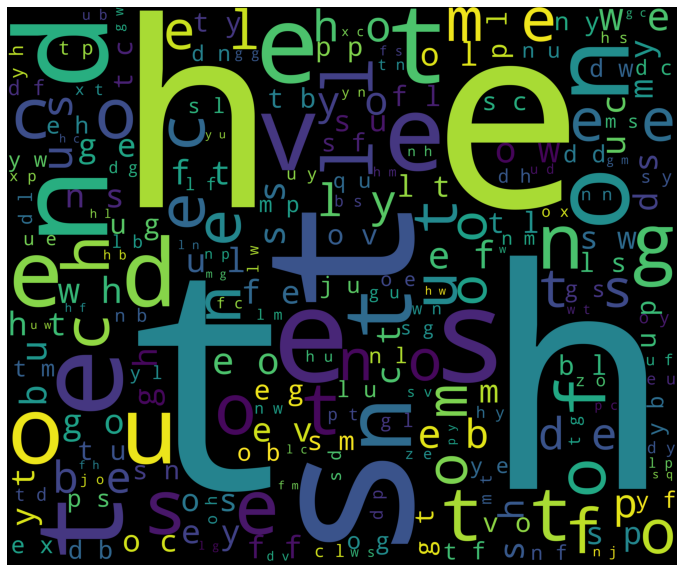

In [192]:
new_df=results_df[results_df['label']=='NEGATIVE']
words = ' '.join(' '.join(l) for l in new_df["Text"])
cleaned_word = " ".join([word for word in words.split()
                        if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [193]:
results_df.shape

(5000, 15)